In [41]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2, ResNet50, VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.models import Model, Sequential
import matplotlib.pyplot as plt
import numpy as np

In [42]:
data_dir = 'C:/Users/melis/CDT_model/clock_shulman'

In [43]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [44]:
train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

Found 2489 images belonging to 6 classes.


In [45]:
val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 619 images belonging to 6 classes.


In [46]:
def build_alexnet():
    model = tf.keras.Sequential([
        Conv2D(96, kernel_size=11, strides=4, activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D(pool_size=3, strides=2),
        Conv2D(256, kernel_size=5, padding="same", activation='relu'),
        MaxPooling2D(pool_size=3, strides=2),
        Conv2D(384, kernel_size=3, padding="same", activation='relu'),
        Conv2D(384, kernel_size=3, padding="same", activation='relu'),
        Conv2D(256, kernel_size=3, padding="same", activation='relu'),
        MaxPooling2D(pool_size=3, strides=2),
        Flatten(),
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        Dense(NUM_CLASSES, activation='softmax')
    ])
    return model

In [48]:
def build_pretrained(base_model_class):
    base_model = base_model_class(weights='imagenet', include_top=False, input_shape=(224,224,3))
    base_model.trainable = False
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(128, activation='relu')(x)
    output = Dense(train_gen.num_classes, activation='softmax')(x)
    return Model(inputs=base_model.input, outputs=output)

In [50]:
model_builders = {
    "AlexNet": build_alexnet,
    "GoogLeNet": lambda: build_pretrained(InceptionV3),
    "VGG19": lambda: build_pretrained(VGG19),
    "ResNet50": lambda: build_pretrained(ResNet50),
    "EfficientNetB0": lambda: build_pretrained(EfficientNetB0),
    "DenseNet121": lambda: build_pretrained(DenseNet121)
}

histories = {}

for name, model in models.items():
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    print(f"Training {name}...")
    history = model.fit(train_gen, validation_data=val_gen, epochs=5)
    histories[name] = history
    model.save(f"{name}.h5")


Training MobileNetV2...
Epoch 1/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 54s 668ms/step - accuracy: 0.7411 - loss: 0.6099 - val_accuracy: 0.6850 - val_loss: 0.7940
Epoch 2/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 44s 561ms/step - accuracy: 0.7594 - loss: 0.5960 - val_accuracy: 0.6914 - val_loss: 0.7603
Epoch 3/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 46s 584ms/step - accuracy: 0.7392 - loss: 0.6150 - val_accuracy: 0.6850 - val_loss: 0.7594
Epoch 4/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 29s 374ms/step - accuracy: 0.7535 - loss: 0.5793 - val_accuracy: 0.6753 - val_loss: 0.8021
Epoch 5/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 29s 374ms/step - accuracy: 0.7538 - loss: 0.5868 - val_accuracy: 0.6995 - val_loss: 0.7687


Training ResNet50...
Epoch 1/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 56s 675ms/step - accuracy: 0.6089 - loss: 0.9339 - val_accuracy: 0.6123 - val_loss: 0.9262
Epoch 2/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 64s 827ms/step - accuracy: 0.5856 - loss: 0.9401 - val_accuracy: 0.5994 - val_loss: 0.9117
Epoch 3/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 60s 768ms/step - accuracy: 0.6108 - loss: 0.9210 - val_accuracy: 0.6171 - val_loss: 0.9092
Epoch 4/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 52s 668ms/step - accuracy: 0.6062 - loss: 0.9260 - val_accuracy: 0.6349 - val_loss: 0.9030
Epoch 5/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.5852 - loss: 0.9106 - val_accuracy: 0.6107 - val_loss: 0.9155


Training VGG16...
Epoch 1/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.7133 - loss: 0.6937 - val_accuracy: 0.7076 - val_loss: 0.7107
Epoch 2/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.7550 - loss: 0.6114 - val_accuracy: 0.6284 - val_loss: 0.8060
Epoch 3/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.7484 - loss: 0.5892 - val_accuracy: 0.7027 - val_loss: 0.7462
Epoch 4/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.7781 - loss: 0.5891 - val_accuracy: 0.7044 - val_loss: 0.7276
Epoch 5/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.7578 - loss: 0.5985 - val_accuracy: 0.6947 - val_loss: 0.7862


Training CustomCNN...
Epoch 1/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 36s 440ms/step - accuracy: 0.5551 - loss: 1.0294 - val_accuracy: 0.5687 - val_loss: 1.0232
Epoch 2/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 32s 404ms/step - accuracy: 0.5385 - loss: 1.0127 - val_accuracy: 0.5848 - val_loss: 0.9882
Epoch 3/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 34s 438ms/step - accuracy: 0.5506 - loss: 1.0516 - val_accuracy: 0.5250 - val_loss: 1.0348
Epoch 4/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 46s 591ms/step - accuracy: 0.5688 - loss: 0.9965 - val_accuracy: 0.5751 - val_loss: 0.9850
Epoch 5/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 56s 720ms/step - accuracy: 0.5612 - loss: 1.0069 - val_accuracy: 0.5654 - val_loss: 0.9993


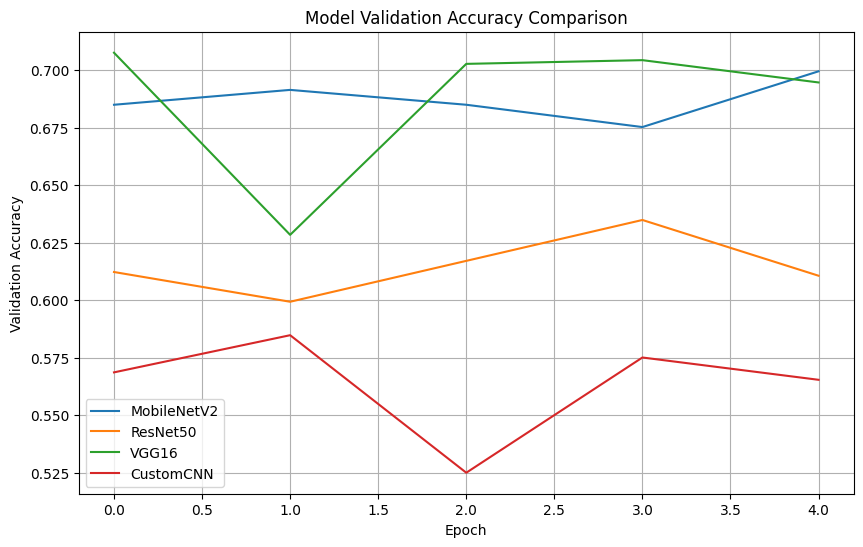

In [51]:
plt.figure(figsize=(10, 6))
for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=name)
plt.title("Model Validation Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [52]:
from tensorflow.keras.preprocessing import image

In [53]:
img_path = r'C:\Users\melis\CDT_model\clock_shulman\12065_0.png'
img = image.load_img(img_path, target_size=(224, 224))

In [54]:
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Aynı ölçekleme!

In [59]:
from tensorflow.keras.models import load_model

best_model = load_model(r'C:\Users\melis\CDT_model\VGG16.h5')
pred = best_model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


In [60]:
predicted_class = np.argmax(pred)
class_labels = list(train_gen.class_indices.keys())
print(f"Tahmin edilen sınıf: {class_labels[predicted_class]}")

Tahmin edilen sınıf: 5_perfect_clock
